# Machine Learning Final Project Template

This is the template for the final project of the course.

Form groups of 3 people, take this template and add your code to it. Choose one of the team member's GitHub and upload it there, so that you can all collaborate.

## 1. Imports and Setup

In [3]:
# Import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For machine learning (you will probably need to add more)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report, mean_squared_error

## 2. Load the Data

We present to you two different datasets. One is for regression and the other for classification. **Chose only one of them**.

Here are their characteristics and their original documentation if you want to check it out:

#### **Bike Sharing Demand - Regression**

**Dataset's description**

*Bike sharing systems are a means of renting bicycles where the process of obtaining membership, rental, and bike return is automated via a network of kiosk locations throughout a city. Using these systems, people are able rent a bike from a one location and return it to a different place on an as-needed basis. Currently, there are over 500 bike-sharing programs around the world.*

*The data generated by these systems makes them attractive for researchers because the duration of travel, departure location, arrival location, and time elapsed is explicitly recorded. Bike sharing systems therefore function as a sensor network, which can be used for studying mobility in a city. In this competition, participants are asked to combine historical usage patterns with weather data in order to forecast bike rental demand in the Capital Bikeshare program in Washington, D.C.*

*You are provided hourly rental data spanning two years. You must predict the total count of bikes rented during each hour*.

Original documentation: https://www.kaggle.com/competitions/bike-sharing-demand/

You should be able to download the .csv file from our GitHub:

In [5]:
bike_sharing_demand_df = pd.read_csv('bike-sharing-demand.csv')

#### **Wine quality - Classification**

**Dataset's description**

*Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests*.

*These datasets can be viewed as classification or regression tasks.  The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.*

*You are provided the physicochemical characteristics of the wine. You must predict the sensory perception (quality) of it (1 - 10).*

**It could be seen as a regression or a classification. We recommend to choose the other dataset if you want to perform regression, but you are welcome to attack this problem from a regression perspective too.**

Original documentation: https://archive.ics.uci.edu/dataset/186/wine+quality

In [7]:
!pip install ucimlrepo

In [8]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine_quality = fetch_ucirepo(id=186)

# data (as pandas dataframes)
X = wine_quality.data.features
y = wine_quality.data.targets

# Put them together in a single dataframe
wine_quality_df = pd.concat([X, y], axis=1)

Choose one of them.

Now:
- Divide your data in the training and test sets. Remember, the EDA is only done with the training set. Use a specific seed (so it is replicable each time you execute). Leave test set aside until the end of the project.
- Since we are going to do cross-validation, it is not necessary to divide the train set on validation and train.

In [10]:
# Your code goes here
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(wine_quality_df, test_size=0.2, random_state=42)

## 3. Exploratory Data Analysis

### 3.1. Initial exploration

- See the columns of your data
- View basic statistics
- Check for missing values
- Visualize distributions, relationships and correlations between attributes/columns.

In [13]:
wine_quality_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [14]:
wine_quality_df.info()
wine_quality_df.describe()
wine_quality_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

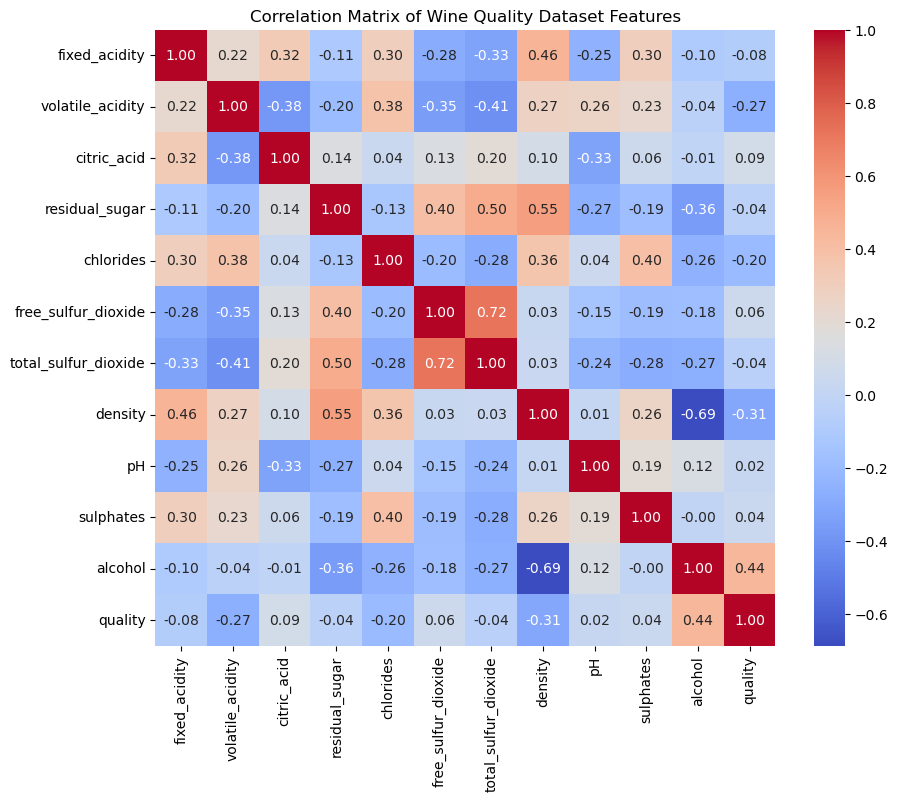

In [15]:
correlation_matrix = wine_quality_df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Wine Quality Dataset Features')
plt.show()

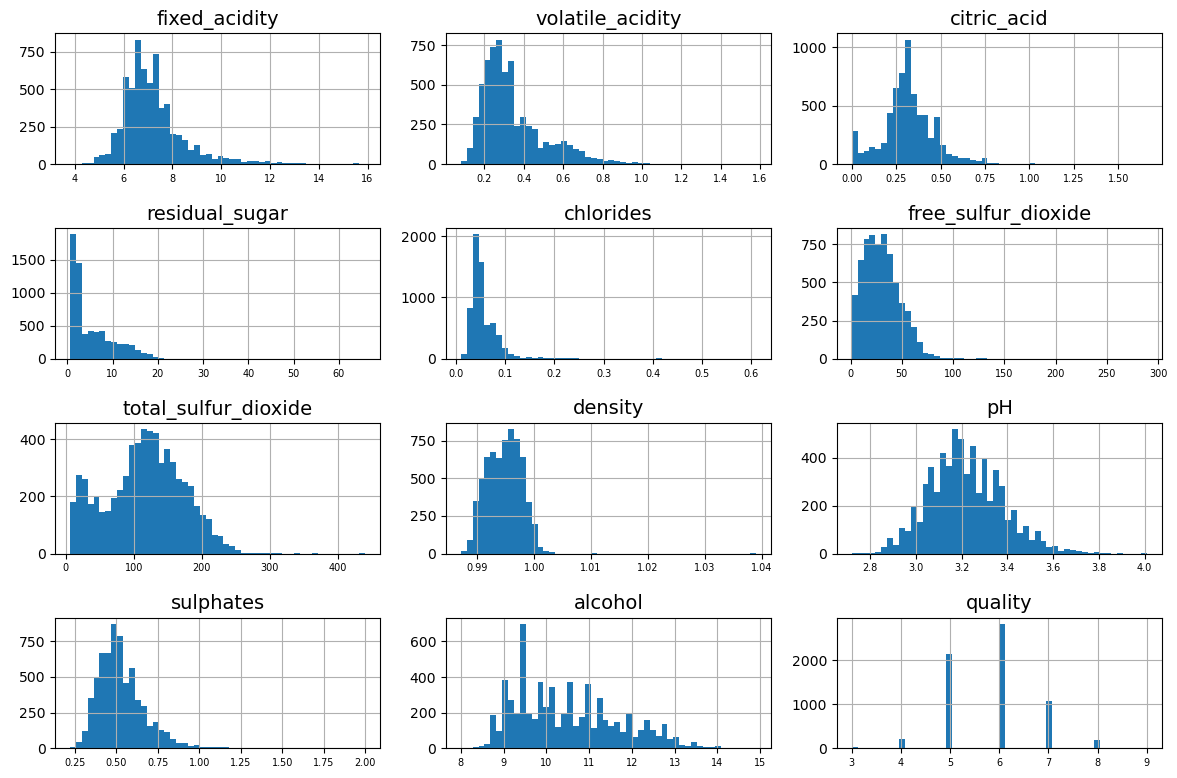

In [16]:
# Plot histograms
import matplotlib.pyplot as plt

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=7)
plt.rc('ytick', labelsize=10)

wine_quality_df.hist(bins=50, figsize=(12, 8))

plt.tight_layout()
plt.show()

### 3.2. Data cleaning

- Handle missing values, duplicates, and outliers.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6346 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB

Missing values after replacing 0s in citric_acid:
136


<Axes: >

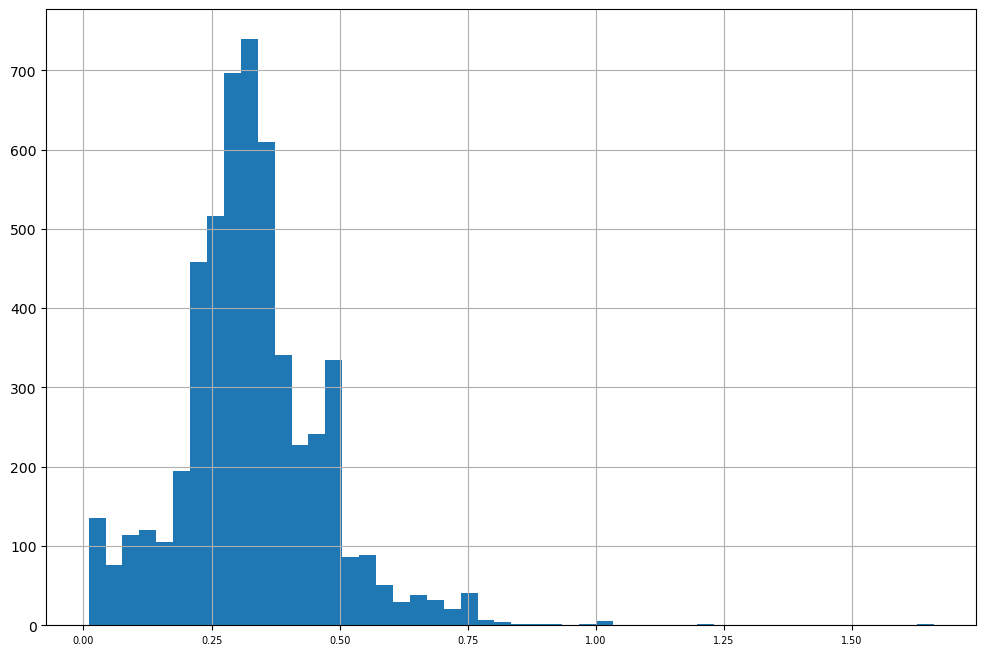

In [20]:
# Your code goes here
wine_quality_df['citric_acid'].value_counts().sort_index() # It has zeros
wine_quality_df['free_sulfur_dioxide'].value_counts().sort_index() # It doesn't have zeros
wine_quality_df['citric_acid'] = wine_quality_df['citric_acid'].replace(0, np.nan)
wine_quality_df.info()

# Check drop_duplicates() function from pandas
wine_quality_df = wine_quality_df.drop_duplicates()

missing_values_after_replace = wine_quality_df['citric_acid'].isnull().sum()
print("\nMissing values after replacing 0s in citric_acid:")
print(missing_values_after_replace)

# Justification: Using the median is often preferred over the mean for imputation when the data might have outliers, as the median is less affected by extreme values.
median_value = wine_quality_df['citric_acid'].median()
wine_quality_df['citric_acid'] = wine_quality_df['citric_acid'].fillna(median_value)
wine_quality_df['citric_acid'].hist(bins=50, figsize=(12, 8))

### 3.3. Feature Engineering

- Create new features (if you consider they might be useful) given the existing ones.
- Encode categorical variables (if any)
- Transform numerical features so that they have similar scales

## 4. Training

### 4.1. Define Features and Target

- Define X (features) and y (target)

In [25]:
y_train = train_set["quality"]
X_train = train_set.drop("quality", axis=1)

y_test = test_set["quality"]
X_test = test_set.drop("quality", axis=1)

### 4.2. Train your model and evaluate it using Cross-validation

- Import the models that you want to use from sklearn.
- Choose some metrics that will let you know how the models are performing.
- Use cross-validation to validate them and compare their performances. Choose the best one.
- (Optional) Perform a hyperparameter search to improve the training of the model.

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler

# Escalador
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=10000, tol=0.0001)

# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)

# Doing scaling it converges!
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

print(f"Modelo: {"Logistic Regression"}")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

Modelo: Logistic Regression
Accuracy: 0.5361538461538462
F1 Score: 0.5019301746551242


In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler

# Modelos y si requieren normalización
models = {
    "Logistic Regression": (LogisticRegression(max_iter=10000, tol=0.0001), True),
    "Random Forest": (RandomForestClassifier(), False),
    "SVM": (SVC(probability=True), True),
    "KNN": (KNeighborsClassifier(), True),
    "Naive Bayes": (GaussianNB(), True),  # opcional pero recomendable
    "Decision Tree": (DecisionTreeClassifier(), False)
}

# Escalador
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar y evaluar
for name, (model, needs_scaling) in models.items():
    print(f"Modelo: {name}")
    if needs_scaling:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"  Accuracy: {acc:.4f}")
    print(f"  F1 Score: {f1:.4f}")
    print("-" * 30)

Modelo: Logistic Regression
  Accuracy: 0.5362
  F1 Score: 0.5019
------------------------------
Modelo: Random Forest
  Accuracy: 0.6669
  F1 Score: 0.6549
------------------------------
Modelo: SVM
  Accuracy: 0.5600
  F1 Score: 0.5225
------------------------------
Modelo: KNN
  Accuracy: 0.5454
  F1 Score: 0.5350
------------------------------
Modelo: Naive Bayes
  Accuracy: 0.4654
  F1 Score: 0.4610
------------------------------
Modelo: Decision Tree
  Accuracy: 0.5977
  F1 Score: 0.5980
------------------------------


In [37]:
print("🎯 Accuracy sobre los MISMOS datos de ENTRENAMIENTO:\n")
for name, (model, needs_scaling) in models.items():
    if needs_scaling:
        y_train_pred = model.predict(X_train_scaled)
    else:
        y_train_pred = model.predict(X_train)

    acc = accuracy_score(y_train, y_train_pred)
    print(f"{name}: {acc:.4f}")

🎯 Accuracy sobre los MISMOS datos de ENTRENAMIENTO:

Logistic Regression: 0.5520
Random Forest: 1.0000
SVM: 0.6082
KNN: 0.7068
Naive Bayes: 0.4593
Decision Tree: 1.0000


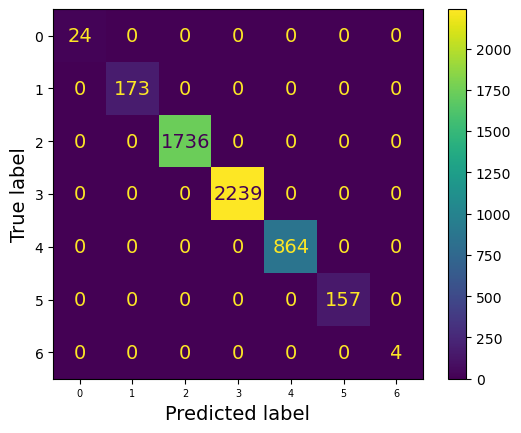

In [38]:
# See confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_mat_diabetes = confusion_matrix(y_train, y_train_pred)
display_labels = ["","","",""]
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat_diabetes)
disp.plot()

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score

# Modelos
from sklearn.linear_model import (
    LogisticRegression, PassiveAggressiveClassifier, RidgeClassifier
)
from sklearn.ensemble import (
    RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier,
    HistGradientBoostingClassifier, BaggingClassifier
)
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 📦 Modelos básicos
basic_models = {
    "Logistic Regression": (LogisticRegression(max_iter=10000, tol=0.0001), True),
    "Random Forest": (RandomForestClassifier(), False),
    "SVC": (SVC(probability=True), True),
    "KNN": (KNeighborsClassifier(), True),
    "Naive Bayes": (GaussianNB(), True),
    "Decision Tree": (DecisionTreeClassifier(), False)
}

# 🚀 Modelos avanzados
advanced_models = {
    "Gradient Boosting": (GradientBoostingClassifier(), False),
    "HistGradient Boosting": (HistGradientBoostingClassifier(), False),
    "AdaBoost": (AdaBoostClassifier(), False),
    "Bagging": (BaggingClassifier(), False),
    "Linear Discriminant Analysis": (LinearDiscriminantAnalysis(), True),
    "Quadratic Discriminant Analysis": (QuadraticDiscriminantAnalysis(), True),
    "MLP (Neural Network)": (MLPClassifier(max_iter=1000), True),
    "Passive Aggressive": (PassiveAggressiveClassifier(max_iter=1000), True),
    "Ridge Classifier": (RidgeClassifier(), True)
}

# 🔗 Todos los modelos
all_models = {**basic_models, **advanced_models}

# 📊 Resultados
results = []

for name, (model, needs_scaling) in all_models.items():
    if needs_scaling:
        model.fit(X_train_scaled, y_train)
        y_train_pred = model.predict(X_train_scaled)
        y_test_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
    
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred, average='weighted')
    overfit_gap = train_acc - test_acc
    
    results.append({
        "Modelo": name,
        "Accuracy Train": train_acc,
        "Accuracy Test": test_acc,
        "Overfitting Gap": overfit_gap,
        "F1 Score Test": f1
    })

# 📋 Tabla ordenada por F1-score
df_results = pd.DataFrame(results)
df_results = df_results.sort_values(by="F1 Score Test", ascending=False)

# Mostrar
print(df_results.to_string(index=False, float_format="%.4f"))


C:\Users\rpieres\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\rpieres\AppData\Roaming\Python\Python312\site-packages\sklearn\discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


                         Modelo  Accuracy Train  Accuracy Test  Overfitting Gap  F1 Score Test
                  Random Forest          1.0000         0.6762           0.3238         0.6647
          HistGradient Boosting          0.9733         0.6362           0.3371         0.6310
                        Bagging          0.9821         0.6308           0.3513         0.6230
                  Decision Tree          1.0000         0.6077           0.3923         0.6082
              Gradient Boosting          0.7108         0.5862           0.1246         0.5707
           MLP (Neural Network)          0.6567         0.5646           0.0921         0.5469
                            KNN          0.7068         0.5454           0.1614         0.5350
                            SVC          0.6082         0.5600           0.0482         0.5225
   Linear Discriminant Analysis          0.5434         0.5362           0.0072         0.5098
            Logistic Regression          0.5520   

In [81]:
from sklearn.model_selection import GridSearchCV

# Definimos el modelo
log_reg = LogisticRegression(solver='liblinear', max_iter=10000)

# Definimos el grid de hiperparámetros
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

# Creamos el GridSearch con validación cruzada de 5 particiones
grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)
grid_search.fit(X_train_scaled, y_train)
print("Best parameters:", grid_search.best_params_)
print("Best cross-validated accuracy score:", grid_search.best_score_)

Best parameters: {'C': 10, 'penalty': 'l1'}
Best cross-validated accuracy score: 0.5460846529822089


In [93]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

SVC_Classification = SVC(probability=True)

# Definimos los parámetros a ajustar (usa 'svm__' por el pipeline)
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3]  # solo afecta si kernel='poly'
}

# GridSearch con validación cruzada
grid_search = GridSearchCV(SVC_Classification, param_grid, cv=3, scoring='accuracy', n_jobs=-1)  # f1_macro?
grid_search.fit(X_train_scaled, y_train)  # El pipeline escala les dades automaticament
# cv = Cross Validation

GridSearchCV(cv=3, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'degree': [2, 3],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [95]:
# Resultados
print("Mejores parámetros encontrados:")
print(grid_search.best_params_)

print(f"Mejor F1 Score en validación: {grid_search.best_score_:.4f}")

# Usamos el mejor modelo para evaluar en test
from sklearn.metrics import accuracy_score, f1_score

best_model_SVC = grid_search.best_estimator_
y_pred_test_SVC = best_model_SVC.predict(X_test_scaled)

print(f"Accuracy en test: {accuracy_score(y_test, y_pred_test_SVC):.4f}")
print(f"F1 Score en test: {f1_score(y_test, y_pred_test_SVC, average='weighted'):.4f}")  # average = macro?

Mejores parámetros encontrados:
{'C': 10, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}
Mejor F1 Score en validación: 0.5746
Accuracy en test: 0.5885
F1 Score en test: 0.5640


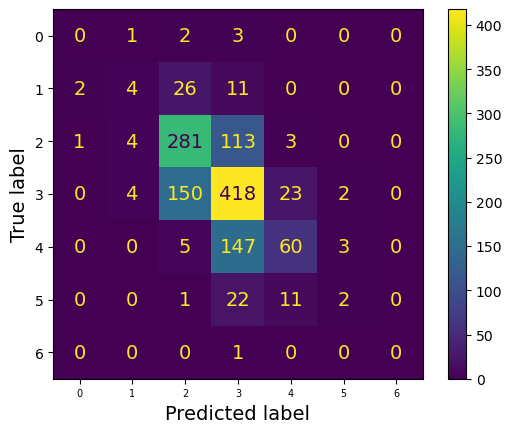

In [103]:
# See confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
conf_mat = confusion_matrix(y_test, y_pred_test_SVC)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
disp.plot()

In [97]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score
from scipy.stats import randint
import numpy as np

random_forest = RandomForestClassifier(random_state=42)

# Distribuciones de hiperparámetros para RandomizedSearch
param_dist = {
    'n_estimators': randint(50, 300),
    'max_depth': [5, 10, 20, None],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['sqrt', 'log2', None]
}

# Búsqueda aleatoria
random_search = RandomizedSearchCV(
    random_forest,
    param_distributions=param_dist,
    n_iter=30,  # Número de combinaciones aleatorias a probar
    scoring='accuracy', # f1_weighted?
    cv=4, # Cross Validation
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Entrenar
random_search.fit(X_train, y_train)

Fitting 4 folds for each of 30 candidates, totalling 120 fits


RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 20, None],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000029EEE118FE0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000029ED86841A0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000029ED8AA8BC0>},
                   random_state=42, scoring='accuracy', verbose=1)

In [99]:
# Evaluar el mejor modelo
best_model_random_forest = random_search.best_estimator_
y_pred_test_random_forest = best_model_random_forest.predict(X_test)
y_pred_train_random_forest = best_model_random_forest.predict(X_train)

# Resultados
print("🔍 Mejor configuración encontrada:")
print(random_search.best_params_)
print()
print("📊 Métricas del modelo:")
print(f"Accuracy train: {accuracy_score(y_train, y_pred_train_random_forest):.4f}")
print(f"Accuracy test:  {accuracy_score(y_test, y_pred_test_random_forest):.4f}")
print(f"F1 score test:  {f1_score(y_test, y_pred_test_random_forest, average='weighted'):.4f}")
print(f"Overfitting gap: {abs(accuracy_score(y_train, y_pred_train_random_forest) - accuracy_score(y_test, y_pred_test_random_forest)):.4f}")

🔍 Mejor configuración encontrada:
{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 107}

📊 Métricas del modelo:
Accuracy train: 0.9948
Accuracy test:  0.6708
F1 score test:  0.6572
Overfitting gap: 0.3240


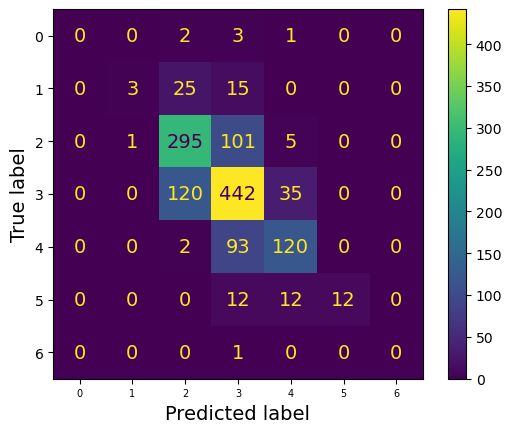

In [105]:
# See confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
conf_mat = confusion_matrix(y_test, y_pred_test_random_forest)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
disp.plot()

## 5. Evaluate on test set

- Clean and do feature engineering process on test set.
- See how the model performs on the test set.

## 6. Conclusions and future work